# RoadSafe Analytics: Road Accidents- Exploratory Data Analysis(EDA)

### Project Objective: To perform a in-depth Exploratory Data Analysis(EDA) of a large dataset of Accidents happened in US from 2016-2023 and draw meaningful insights from it like which factors have affected mostly to the likelihood of accidents in recent years and providing solutions to overcome accidents and so on.

### Expected Outcomes:-
### 1. Gain the ability to clean, preprocess, and understand real-world accident data effectively.

### 2. Explore accident patterns based on time, weather, road conditions, and severity using visual analysis.
 
### 3. Identify correlations, hotspots, and key risk factors through univariate, bivariate, and geospatial analysis.

### 4. Present meaningful insights with clear visualizations, documentation, and a final project presentation.

### Step 1: Setup - Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

sns.set_style('whitegrid')

### Step 2: Data Loading and Initial Inspection

In [42]:
roadsafe_df = pd.read_csv(r"F:\Roadsafe Analytics Project\us-accidents.csv", nrows=50000)
roadsafe_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [43]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   Source                 50000 non-null  object 
 2   Severity               50000 non-null  int64  
 3   Start_Time             50000 non-null  object 
 4   End_Time               50000 non-null  object 
 5   Start_Lat              50000 non-null  float64
 6   Start_Lng              50000 non-null  float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           50000 non-null  float64
 10  Description            50000 non-null  object 
 11  Street                 50000 non-null  object 
 12  City                   50000 non-null  object 
 13  County                 50000 non-null  object 
 14  State                  50000 non-null  object 
 15  Zi

In [44]:
roadsafe_df.isnull().sum()

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  50000
End_Lng                  50000
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      7
Country                      0
Timezone                     7
Airport_Code                 7
Weather_Timestamp          266
Temperature(F)             456
Wind_Chill(F)            47503
Humidity(%)                639
Pressure(in)               306
Visibility(mi)             526
Wind_Direction             267
Wind_Speed(mph)           8422
Precipitation(in)        46724
Weather_Condition          603
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [45]:
print("Descriptive statistics:-")
roadsafe_df.describe()

Descriptive statistics:-


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,50000.00000,50000.000000,50000.000000,0.0,0.0,50000.000000,49544.000000,2497.000000,49361.000000,49694.000000,49474.000000,41578.000000,3276.000000
mean,2.39678,37.396862,-120.736826,NaN,NaN,0.014660,64.975323,39.050541,61.719394,29.981206,9.384875,8.736789,0.026529
std,0.49225,1.553001,4.750326,NaN,NaN,0.354411,13.200795,14.914320,21.706796,0.195356,1.958316,4.475498,0.050507
min,1.00000,32.544304,-123.813927,NaN,NaN,0.000000,3.900000,-8.400000,4.000000,3.010000,0.100000,0.000000,0.000000
25%,2.00000,37.343647,-122.127098,NaN,NaN,0.000000,55.900000,33.400000,46.000000,29.900000,10.000000,5.800000,0.000000
50%,2.00000,37.776711,-121.828537,NaN,NaN,0.000000,64.400000,39.000000,63.000000,29.970000,10.000000,8.100000,0.010000
75%,3.00000,38.409191,-121.272102,NaN,NaN,0.010000,73.400000,42.500000,78.000000,30.070000,10.000000,11.500000,0.030000
max,4.00000,41.428753,-81.550728,NaN,NaN,51.130000,113.000000,101.000000,100.000000,33.040000,80.000000,142.700000,0.550000


In [46]:
roadsafe_df['Street'].value_counts()

Street
I-80 W          1687
US-101 N        1561
I-80 E          1561
I-580 W         1184
I-880 N         1162
                ... 
E 10th St          1
Crestwood Rd       1
E 58th Pl          1
Elberta Rd         1
Pourroy Rd         1
Name: count, Length: 6257, dtype: int64

In [47]:
roadsafe_df['Start_Time']

0        2016-02-08 05:46:00
1        2016-02-08 06:07:59
2        2016-02-08 06:49:27
3        2016-02-08 07:23:34
4        2016-02-08 07:39:07
                ...         
49995    2016-07-20 09:25:59
49996    2016-07-20 09:50:32
49997    2016-07-20 09:27:03
49998    2016-07-20 09:50:59
49999    2016-07-20 09:52:44
Name: Start_Time, Length: 50000, dtype: object

### Step 3: Data Cleaning and Preprocessing

In [48]:
# Dropping columns with excessive null values
cols = ['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)']

roadsafe_df.drop(cols,axis=1,inplace=True)

In [49]:
print("Dataset after removing irrelevant columns:-")
roadsafe_df.head()

Dataset after removing irrelevant columns:-


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


In [50]:
roadsafe_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,50000.00000,50000.000000,50000.000000,50000.000000,49544.000000,49361.000000,49694.000000,49474.000000,41578.000000
mean,2.39678,37.396862,-120.736826,0.014660,64.975323,61.719394,29.981206,9.384875,8.736789
std,0.49225,1.553001,4.750326,0.354411,13.200795,21.706796,0.195356,1.958316,4.475498
min,1.00000,32.544304,-123.813927,0.000000,3.900000,4.000000,3.010000,0.100000,0.000000
25%,2.00000,37.343647,-122.127098,0.000000,55.900000,46.000000,29.900000,10.000000,5.800000
50%,2.00000,37.776711,-121.828537,0.000000,64.400000,63.000000,29.970000,10.000000,8.100000
75%,3.00000,38.409191,-121.272102,0.010000,73.400000,78.000000,30.070000,10.000000,11.500000
max,4.00000,41.428753,-81.550728,51.130000,113.000000,100.000000,33.040000,80.000000,142.700000


In [51]:
roadsafe_df.isna().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     7
Country                     0
Timezone                    7
Airport_Code                7
Weather_Timestamp         266
Temperature(F)            456
Humidity(%)               639
Pressure(in)              306
Visibility(mi)            526
Wind_Direction            267
Wind_Speed(mph)          8422
Weather_Condition         603
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station   

In [52]:
roadsafe_df['Weather_Timestamp']

0        2016-02-08 05:58:00
1        2016-02-08 05:51:00
2        2016-02-08 06:56:00
3        2016-02-08 07:38:00
4        2016-02-08 07:53:00
                ...         
49995    2016-07-20 09:51:00
49996    2016-07-20 09:53:00
49997    2016-07-20 09:53:00
49998    2016-07-20 09:45:00
49999    2016-07-20 09:45:00
Name: Weather_Timestamp, Length: 50000, dtype: object

In [53]:
roadsafe_df['Start_Time'] = pd.to_datetime(roadsafe_df['Start_Time'], errors='coerce')
roadsafe_df['End_Time'] = pd.to_datetime(roadsafe_df['End_Time'], errors='coerce')
roadsafe_df['Weather_Timestamp'] = pd.to_datetime(roadsafe_df['Weather_Timestamp'], errors='coerce')

In [54]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     50000 non-null  object        
 1   Source                 50000 non-null  object        
 2   Severity               50000 non-null  int64         
 3   Start_Time             50000 non-null  datetime64[ns]
 4   End_Time               50000 non-null  datetime64[ns]
 5   Start_Lat              50000 non-null  float64       
 6   Start_Lng              50000 non-null  float64       
 7   Distance(mi)           50000 non-null  float64       
 8   Description            50000 non-null  object        
 9   Street                 50000 non-null  object        
 10  City                   50000 non-null  object        
 11  County                 50000 non-null  object        
 12  State                  50000 non-null  object        
 13  Z

In [55]:
roadsafe_df.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     7
Country                     0
Timezone                    7
Airport_Code                7
Weather_Timestamp         266
Temperature(F)            456
Humidity(%)               639
Pressure(in)              306
Visibility(mi)            526
Wind_Direction            267
Wind_Speed(mph)          8422
Weather_Condition         603
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station   

In [56]:
roadsafe_df['Wind_Speed(mph)'].dtype

dtype('float64')

In [57]:
roadsafe_df['Wind_Speed(mph)']

0        NaN
1        NaN
2        3.5
3        4.6
4        3.5
        ... 
49995    NaN
49996    4.6
49997    NaN
49998    NaN
49999    NaN
Name: Wind_Speed(mph), Length: 50000, dtype: float64

In [58]:
median_speed=roadsafe_df['Wind_Speed(mph)'].median()
roadsafe_df['Wind_Speed(mph)']=roadsafe_df['Wind_Speed(mph)'].fillna(median_speed)

In [59]:
roadsafe_df=roadsafe_df.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Weather_Condition'])

In [60]:
print("Missing values after cleaning the dataset:-")
roadsafe_df.isnull().sum()

Missing values after cleaning the dataset:-


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [61]:
roadsafe_df.describe(include="O")

,ID,Source,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957,48957
unique,48957,2,35650,6158,724,70,3,7398,1,2,116,23,28,2,2,2,2
top,A-1,Source2,Accident on I-80 Westbound at Exits 8A 8B I-880.,I-80 W,Sacramento,Alameda,CA,94551,US,US/Pacific,KMCC,Calm,Clear,Day,Day,Day,Day
freq,1,48919,55,1657,5171,7461,48231,511,48957,48231,3501,7623,27854,32172,34064,36095,38074


In [62]:
roadsafe_df['Start_Time'].dt.hour

0        5
1        6
2        6
3        7
4        7
        ..
49995    9
49996    9
49997    9
49998    9
49999    9
Name: Start_Time, Length: 48957, dtype: int32

In [63]:
# Creating new columns

roadsafe_df['Hour']=roadsafe_df['Start_Time'].dt.hour
roadsafe_df['WeekDay']=roadsafe_df['Start_Time'].dt.day_name()
roadsafe_df['Month']=roadsafe_df['Start_Time'].dt.month_name()

In [64]:
roadsafe_df['Severity']

0        3
1        2
2        2
3        3
4        2
        ..
49995    3
49996    2
49997    2
49998    3
49999    2
Name: Severity, Length: 48957, dtype: int64

In [65]:
boolean_cols = roadsafe_df.select_dtypes(include=['bool']).columns
print(boolean_cols)

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [66]:
bool_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]
roadsafe_df[bool_cols] = roadsafe_df[bool_cols].astype(int)

In [67]:
roadsafe_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,WeekDay,Month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,0,0,0,Night,Night,Night,Night,5,Monday,February
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,0,0,0,Night,Night,Night,Day,6,Monday,February
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,0,1,0,Night,Night,Day,Day,6,Monday,February
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,0,0,0,Night,Day,Day,Day,7,Monday,February
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,0,1,0,Day,Day,Day,Day,7,Monday,February


In [68]:
roadsafe_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Hour',
       'WeekDay', 'Month'],
      dtype='object')

In [69]:
roadsafe_df.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour
count,48957.000000,48957,48957,48957.000000,48957.000000,48957.000000,48957,48957.000000,48957.000000,48957.000000,...,48957.000000,48957.000000,48957.000000,48957.000000,48957.000000,48957.000000,48957.000000,48957.000000,48957.0,48957.00000
mean,2.400004,2016-08-18 15:04:04.780869120,2016-08-18 15:48:05.903895296,37.394613,-120.725406,0.014680,2016-08-18 15:05:44.287027456,65.002053,61.732541,29.980746,...,0.134465,0.000674,0.012031,0.000061,0.019956,0.043998,0.001471,0.100966,0.0,13.61697
min,1.000000,2016-02-08 05:46:00,2016-02-08 06:37:59,32.544304,-123.813927,0.000000,2016-02-08 05:51:00,3.900000,4.000000,3.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
25%,2.000000,2016-06-20 11:09:01,2016-06-20 11:39:01,37.344486,-122.125412,0.000000,2016-06-20 10:53:00,55.900000,46.000000,29.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.00000
50%,2.000000,2016-08-09 23:53:44,2016-08-10 00:24:25,37.773045,-121.831551,0.000000,2016-08-09 23:55:00,64.400000,63.000000,29.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.00000
75%,3.000000,2016-11-03 11:33:49,2016-11-03 12:03:28,38.410576,-121.273590,0.010000,2016-11-03 11:53:00,73.400000,78.000000,30.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.00000
max,4.000000,2017-01-26 20:02:26,2017-01-26 20:47:25,41.428753,-81.550728,51.130000,2017-01-26 19:55:00,113.000000,100.000000,33.040000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,23.00000
std,0.492814,NaN,NaN,1.552034,4.788389,0.357285,NaN,13.190912,21.679139,0.196186,...,0.341155,0.025954,0.109025,0.007828,0.139851,0.205092,0.038322,0.301287,0.0,5.71638


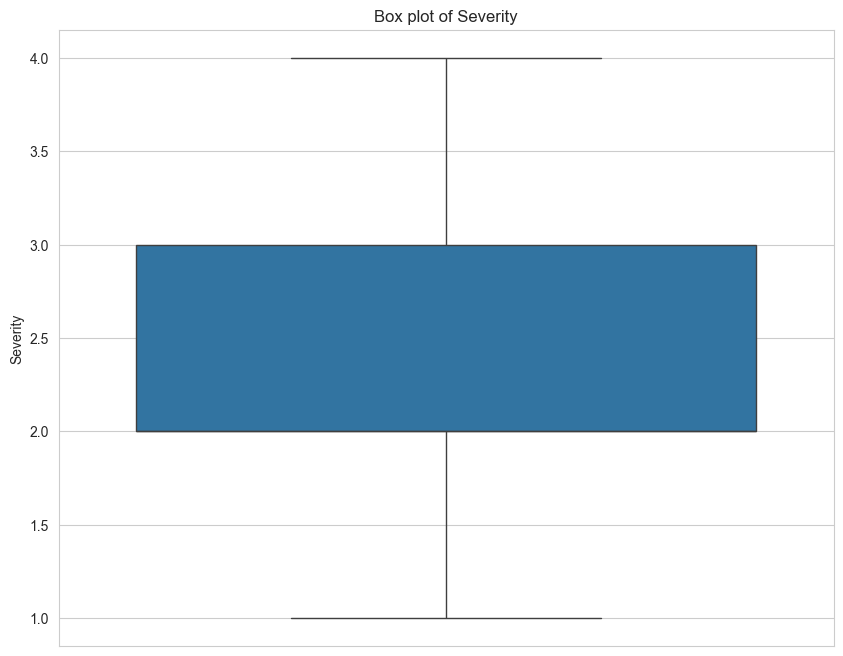

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Severity',data=roadsafe_df)
plt.title('Box plot of Severity')
plt.ylabel('Severity')
plt.show()

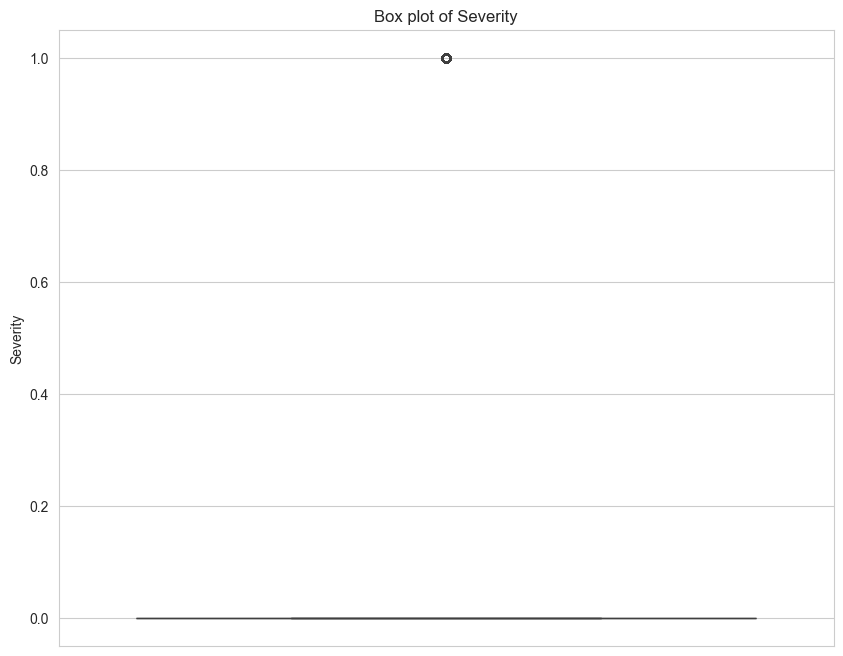

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Traffic_Signal',data=roadsafe_df)
plt.title('Box plot of Severity')
plt.ylabel('Severity')
plt.show()

In [72]:
# Detecting Outliers

numeric_cols = roadsafe_df.select_dtypes(include=['int64','float64']).columns

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.index.tolist()
    
all_outliers = {}
for col in numeric_cols:
    outlier_indices = detect_outliers_iqr(roadsafe_df, col)
    all_outliers[col] = outlier_indices
    print(f"{col}: {len(outlier_indices)} outliers ({len(outlier_indices)/len(roadsafe_df)*100:.4f}%)")

outlier_rows = roadsafe_df.loc[sorted(set(idx for indices in all_outliers.values() for idx in indices))]
print(f"\nTotal unique rows with outliers: {len(outlier_rows)}")

Severity: 0 outliers (0.0000%)
Start_Lat: 7151 outliers (14.6067%)
Start_Lng: 7741 outliers (15.8118%)
Distance(mi): 154 outliers (0.3146%)
Temperature(F): 402 outliers (0.8211%)
Humidity(%): 0 outliers (0.0000%)
Pressure(in): 1379 outliers (2.8168%)
Visibility(mi): 8102 outliers (16.5492%)
Wind_Speed(mph): 1606 outliers (3.2804%)
Amenity: 436 outliers (0.8906%)
Bump: 45 outliers (0.0919%)
Crossing: 4215 outliers (8.6096%)
Give_Way: 140 outliers (0.2860%)
Junction: 6583 outliers (13.4465%)
No_Exit: 33 outliers (0.0674%)
Railway: 589 outliers (1.2031%)
Roundabout: 3 outliers (0.0061%)
Station: 977 outliers (1.9956%)
Stop: 2154 outliers (4.3998%)
Traffic_Calming: 72 outliers (0.1471%)
Traffic_Signal: 4943 outliers (10.0966%)
Turning_Loop: 0 outliers (0.0000%)

Total unique rows with outliers: 27063


In [73]:
# Handling outliers

cols_to_cap = ['Start_Lat', 'Start_Lng', 'Visibility(mi)']

for col in cols_to_cap:
    lower = roadsafe_df[col].quantile(0.01)
    upper = roadsafe_df[col].quantile(0.99)
    roadsafe_df[col] = roadsafe_df[col].clip(lower=lower, upper=upper)

for col in cols_to_cap:
    print(f"{col}: min={roadsafe_df[col].min()}, max={roadsafe_df[col].max()}")

Start_Lat: min=32.850433, max=39.76140584
Start_Lng: min=-122.82605872, max=-84.183693
Visibility(mi): min=1.5, max=10.0


### Step 3: Univariate Analysis 

In [74]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48957 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     48957 non-null  object        
 1   Source                 48957 non-null  object        
 2   Severity               48957 non-null  int64         
 3   Start_Time             48957 non-null  datetime64[ns]
 4   End_Time               48957 non-null  datetime64[ns]
 5   Start_Lat              48957 non-null  float64       
 6   Start_Lng              48957 non-null  float64       
 7   Distance(mi)           48957 non-null  float64       
 8   Description            48957 non-null  object        
 9   Street                 48957 non-null  object        
 10  City                   48957 non-null  object        
 11  County                 48957 non-null  object        
 12  State                  48957 non-null  object        
 13  Zipcod

Text(0.5, 1.0, 'Week Day Distribution')

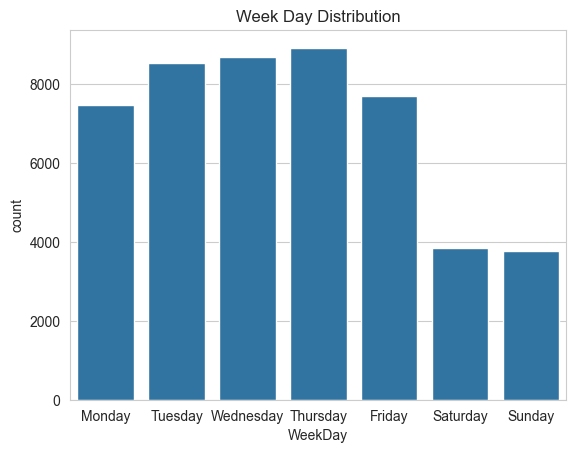

In [75]:
sns.countplot(x='WeekDay',data=roadsafe_df).set_title('Week Day Distribution') 

### Key Insights:-
#### Most of the accidents happened on Tuesday,Wednesday and Thursday

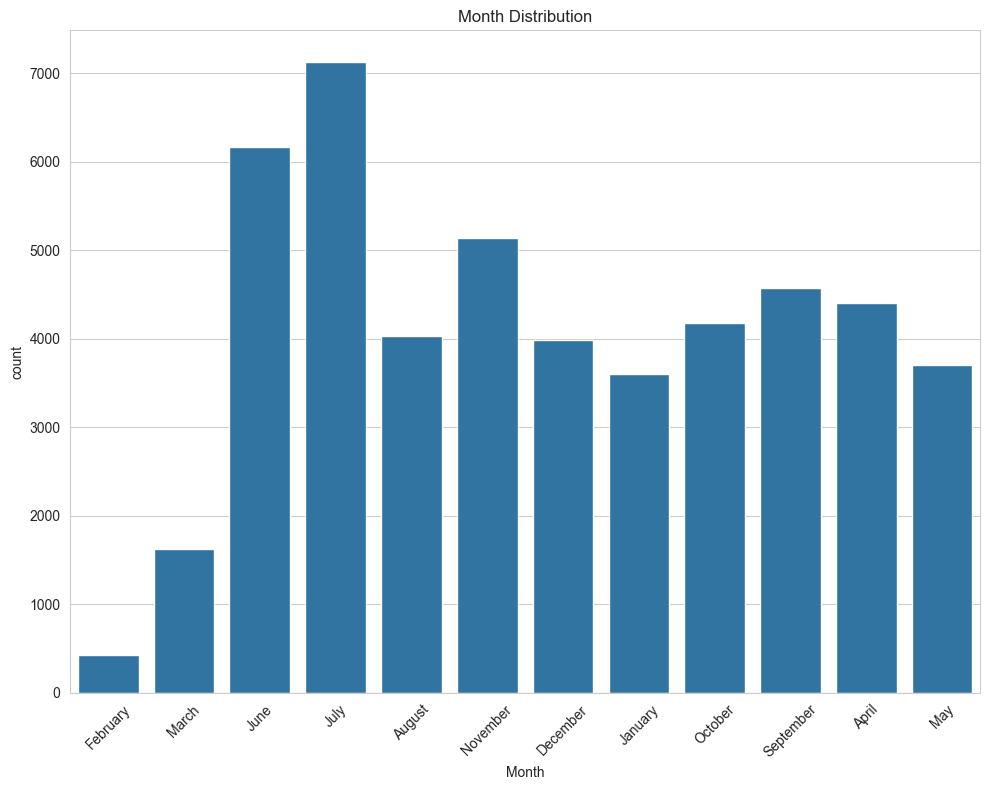

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month',data=roadsafe_df)
plt.title('Month Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Insights:-
#### Accidents in US have occured the most in the month of July.

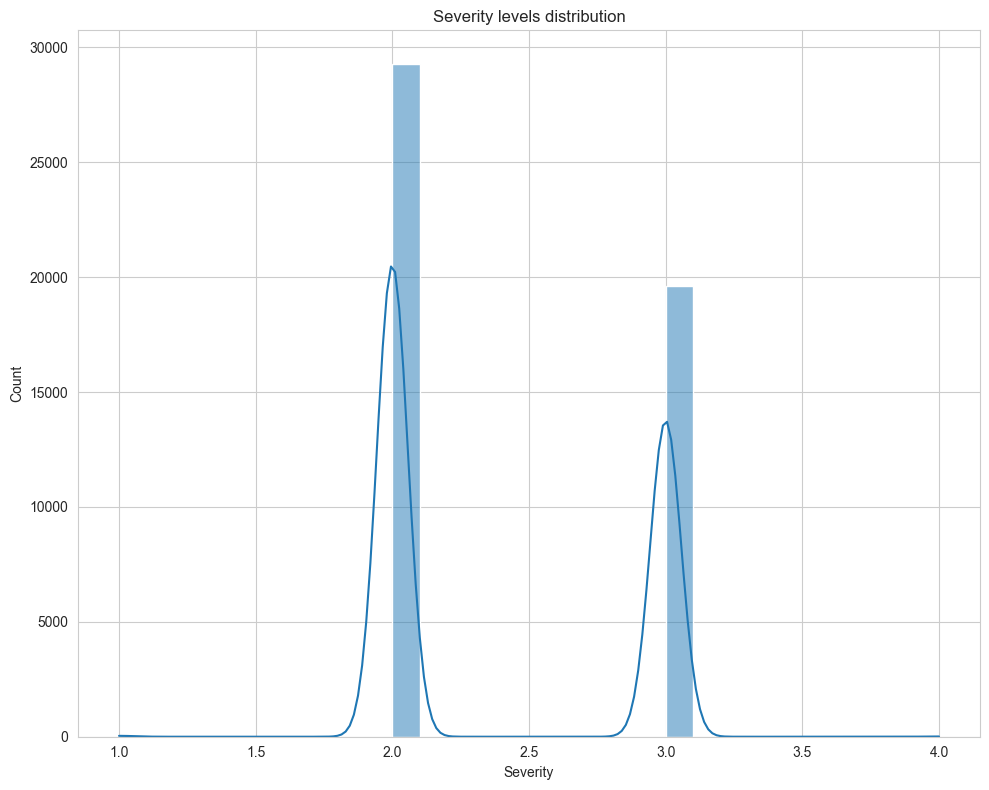

In [77]:
plt.figure(figsize=(10,8))
sns.histplot(x='Severity',data=roadsafe_df,bins=30,kde=True)
plt.title('Severity levels distribution')
plt.tight_layout()
plt.show()

### Key Insights:-
#### The severity distribution peaks at levels 2 and 3, indicating that most accidents in the dataset are of moderate to moderately high severity, while extremely severe accidents (level 4) are relatively rare.

### Key Insights:-
#### Almost all accidents happened in California.

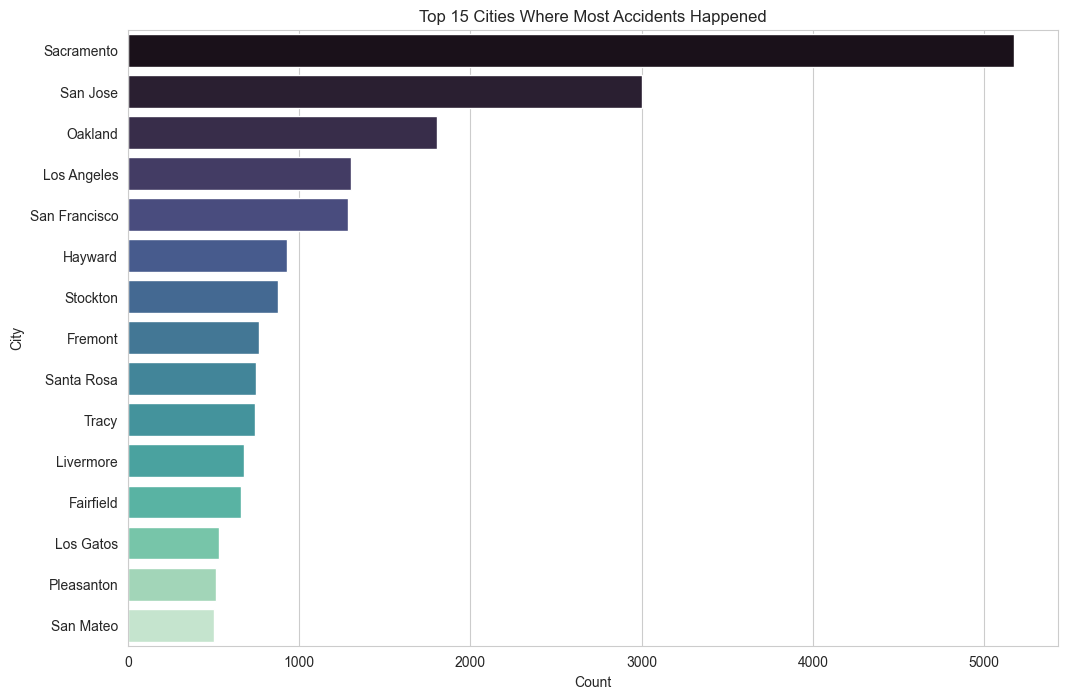

In [78]:
# Get the top 15 cities and their counts
top_cities_counts = roadsafe_df['City'].value_counts().reset_index()
top_cities_counts.columns = ['City', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_cities_counts_plot = top_cities_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='City', x='count', data=top_cities_counts_plot, palette='mako', hue='City', legend=False)
plt.title('Top 15 Cities Where Most Accidents Happened')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

### Key Insights:-

#### Most accidents happened in Sacramento, California.

In [79]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48957 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     48957 non-null  object        
 1   Source                 48957 non-null  object        
 2   Severity               48957 non-null  int64         
 3   Start_Time             48957 non-null  datetime64[ns]
 4   End_Time               48957 non-null  datetime64[ns]
 5   Start_Lat              48957 non-null  float64       
 6   Start_Lng              48957 non-null  float64       
 7   Distance(mi)           48957 non-null  float64       
 8   Description            48957 non-null  object        
 9   Street                 48957 non-null  object        
 10  City                   48957 non-null  object        
 11  County                 48957 non-null  object        
 12  State                  48957 non-null  object        
 13  Zipcod

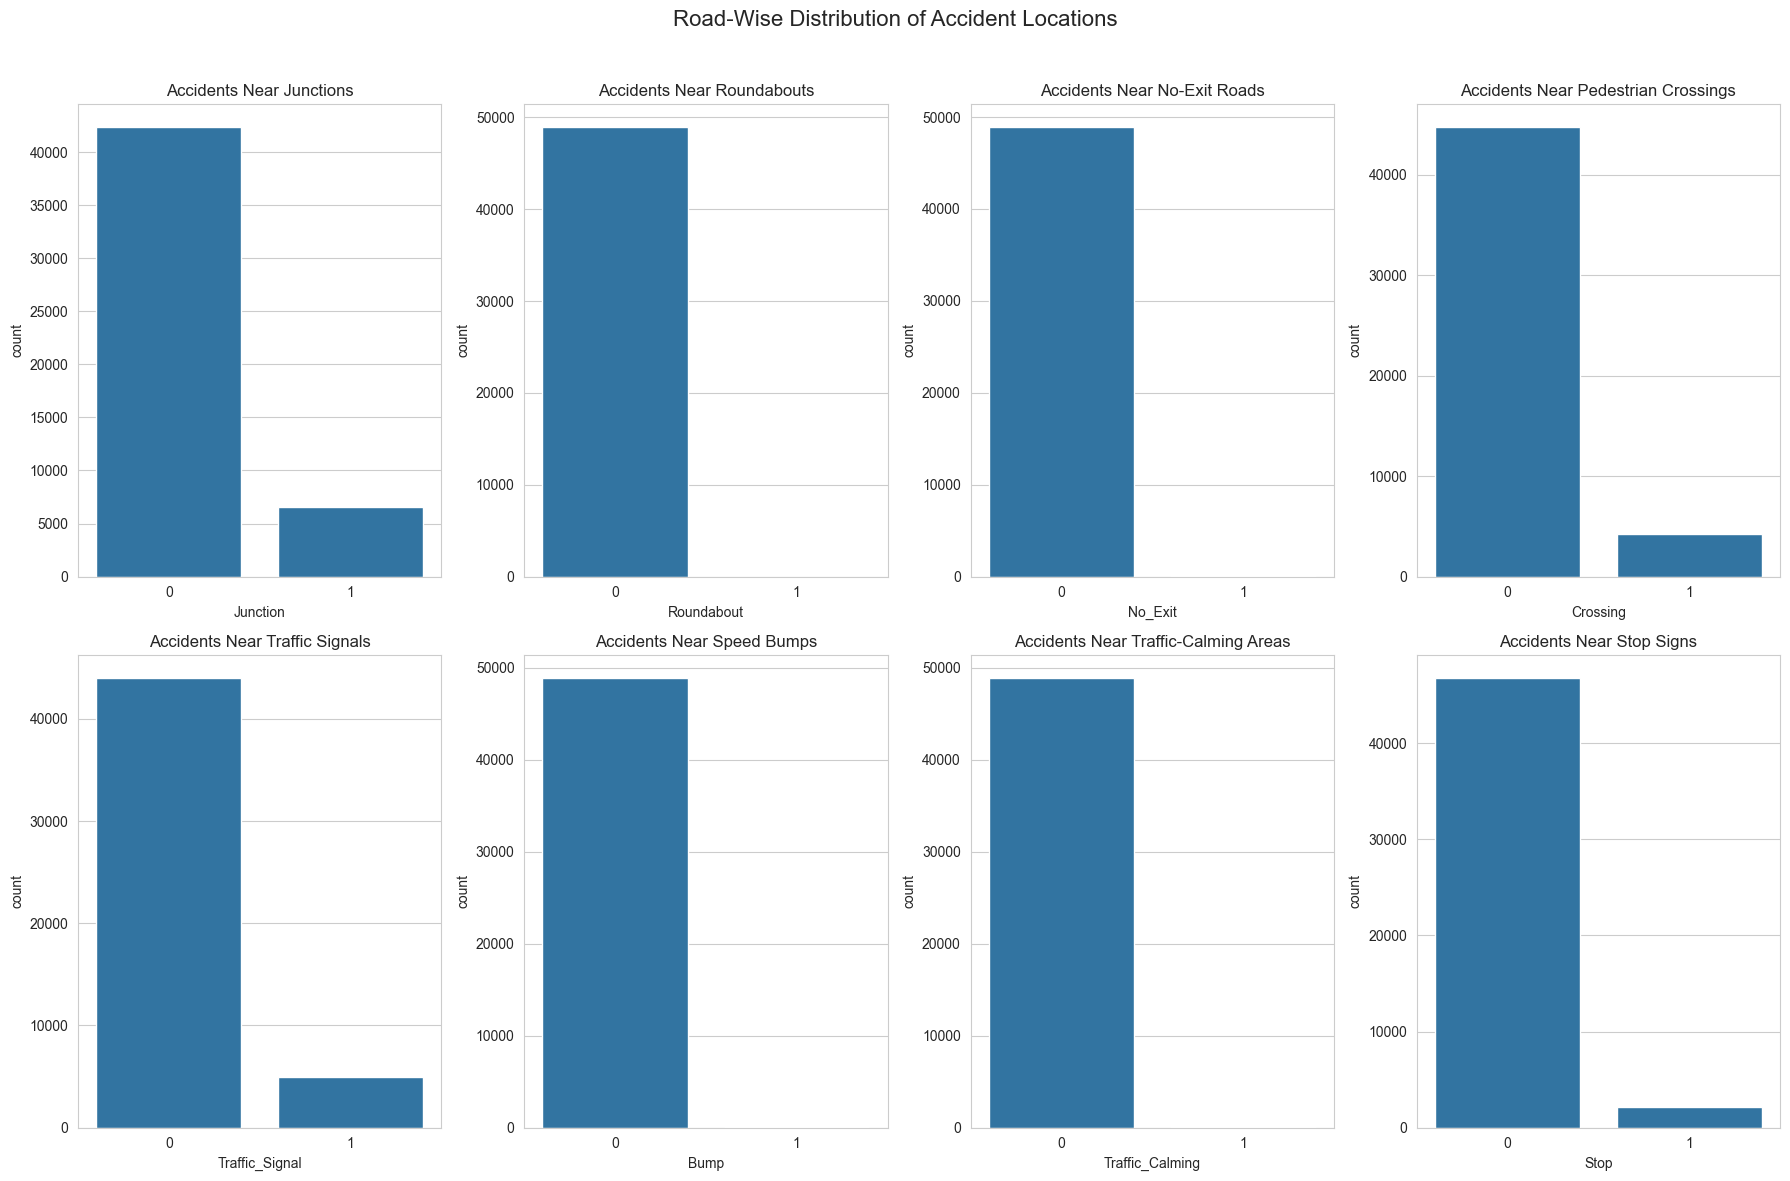

In [80]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Road-Wise Distribution of Accident Locations', fontsize=16)

# Row 1
sns.countplot(ax=axes[0, 0], x='Junction', data=roadsafe_df).set_title('Accidents Near Junctions')
sns.countplot(ax=axes[0, 1], x='Roundabout', data=roadsafe_df).set_title('Accidents Near Roundabouts')
sns.countplot(ax=axes[0, 2], x='No_Exit', data=roadsafe_df).set_title('Accidents Near No-Exit Roads')
sns.countplot(ax=axes[0, 3], x='Crossing', data=roadsafe_df).set_title('Accidents Near Pedestrian Crossings')

# Row 2
sns.countplot(ax=axes[1, 0], x='Traffic_Signal', data=roadsafe_df).set_title('Accidents Near Traffic Signals')
sns.countplot(ax=axes[1, 1], x='Bump', data=roadsafe_df).set_title('Accidents Near Speed Bumps')
sns.countplot(ax=axes[1, 2], x='Traffic_Calming', data=roadsafe_df).set_title('Accidents Near Traffic-Calming Areas')
sns.countplot(ax=axes[1, 3], x='Stop', data=roadsafe_df).set_title('Accidents Near Stop Signs')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Key Insights:-

#### 1. No accident happened near a Roundabout, No_Exit, Bump and Traffic Calming road types.
#### 2. Junctions, Crossings, Traffic_Signal and Stop are the road types where most accidents happened.

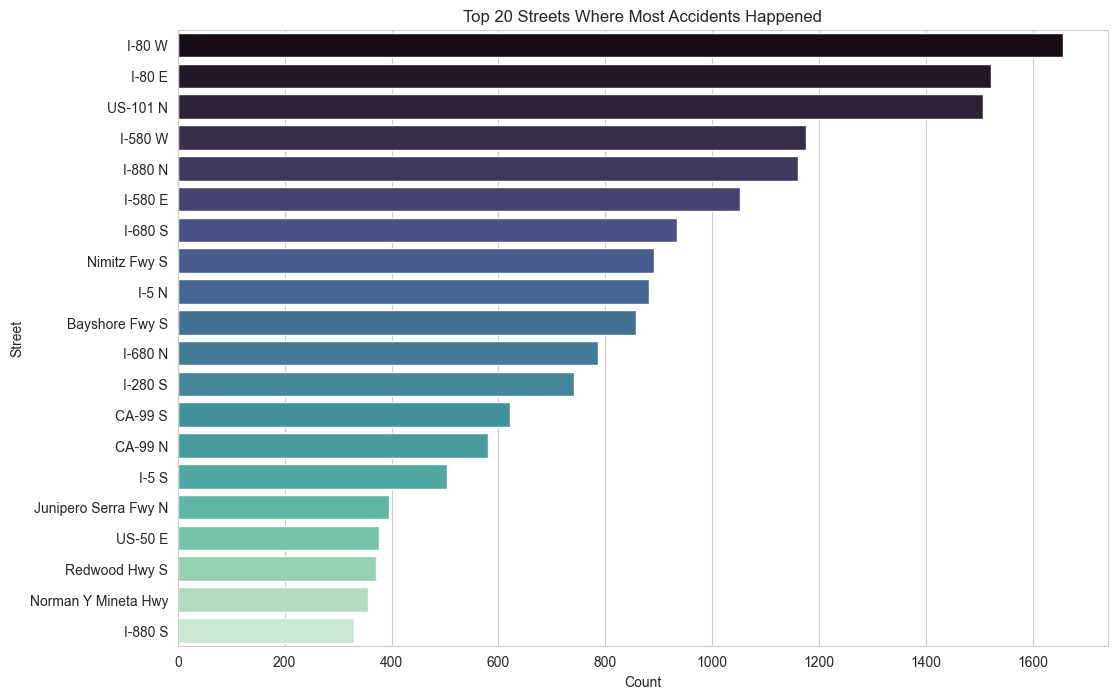

In [81]:
# Get the top 20 streets and their counts
top_street_counts = roadsafe_df['Street'].value_counts().reset_index()
top_street_counts.columns = ['Street', 'count'] # Rename columns for clarity

# Select only the top 20 for plotting
top_street_counts_plot = top_street_counts.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y='Street', x='count', data=top_street_counts_plot, palette='mako', hue='Street', legend=False)
plt.title('Top 20 Streets Where Most Accidents Happened')
plt.xlabel('Count')
plt.ylabel('Street')
plt.show()

### Key Insights:-

#### Top 3 streets where most of the accidents were recorded are I-80 West, I-80 East and US-101 North respectively.

In [82]:
roadsafe_df[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].nunique()

Sunrise_Sunset           2
Civil_Twilight           2
Nautical_Twilight        2
Astronomical_Twilight    2
dtype: int64

In [83]:
roadsafe_df['TimeOfDay'] = roadsafe_df['Sunrise_Sunset'].map({
    'Day': 'Day',
    'Night': 'Night'
})

In [84]:
roadsafe_df.drop(
    ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
    axis=1,
    inplace=True
)

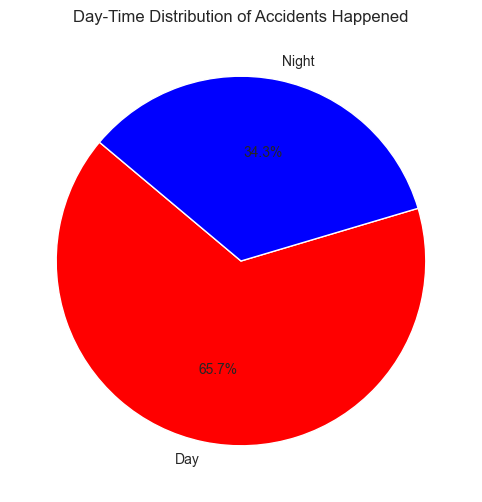

In [85]:
plt.figure(figsize=(8, 6))
daytime_counts = roadsafe_df['TimeOfDay'].value_counts()
plt.pie(daytime_counts, labels=daytime_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Day-Time Distribution of Accidents Happened')
plt.ylabel('')
plt.show()

### Key Insights:-
#### Accidents happened mostly in daytime.

### Step-4:Bivariate Analysis

Bivariate Analysis: Feature vs. Severity


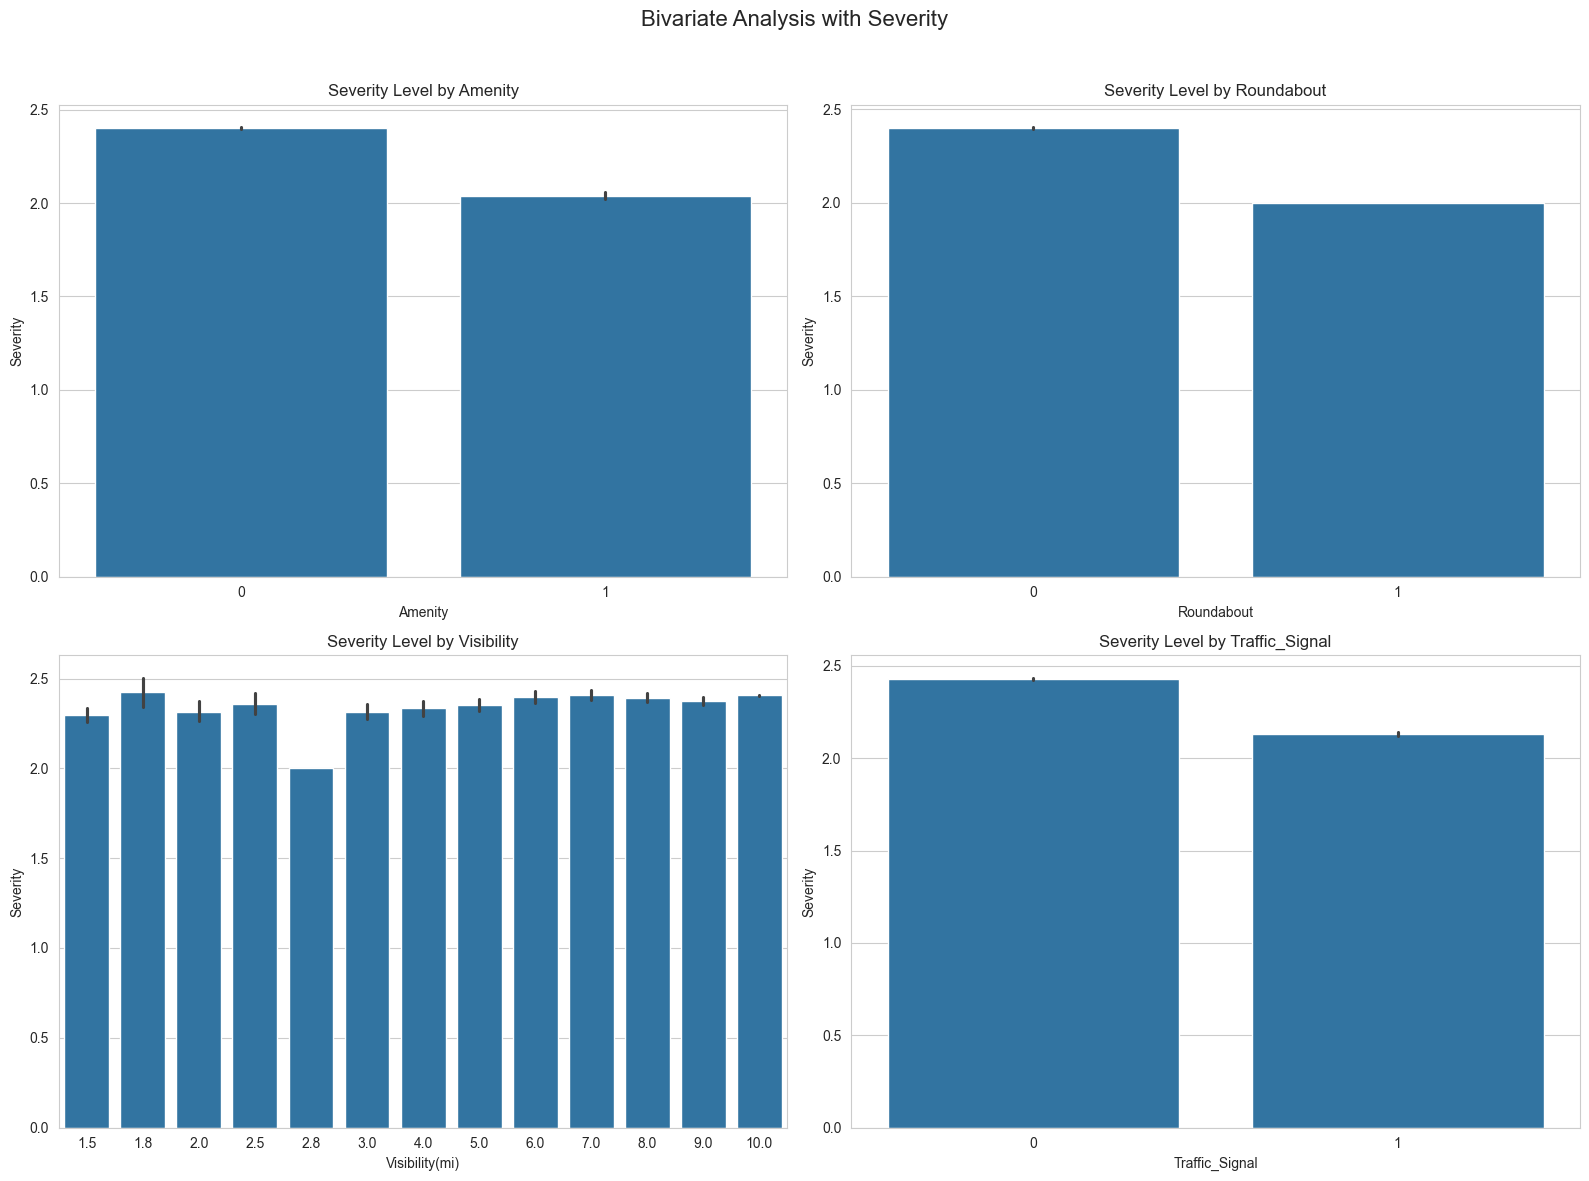

In [86]:
print("Bivariate Analysis: Feature vs. Severity")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Severity', fontsize=16)

sns.barplot(ax=axes[0, 0], x='Amenity', y='Severity', data=roadsafe_df).set_title('Severity Level by Amenity')

sns.barplot(ax=axes[0, 1], x='Roundabout', y='Severity', data=roadsafe_df).set_title('Severity Level by Roundabout')

sns.barplot(ax=axes[1, 0], x='Visibility(mi)', y='Severity', data=roadsafe_df).set_title('Severity Level by Visibility')

sns.barplot(ax=axes[1, 1], x='Traffic_Signal', y='Severity', data=roadsafe_df).set_title('Severity Level by Traffic_Signal')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Key Insights:-

#### 1. Amenity and Roundabout: When there is an amenity or a roundabout, the severity level is around 2.
#### 2. Visibility(mi): The severity level is highest when the visibility is lowest.
#### 3. Traffic_Signal: When there is a traffic signal present in an area, the severity of accident is moderate.

In [87]:
roadsafe_df.drop('Hour',axis=1,inplace=True)

In [88]:
cols_to_drop = [
    'ID', 'Description', 'Street', 'Zipcode', 'Country',
    'Airport_Code', 'Source', 'Turning_Loop', 'Timezone']

roadsafe_df.drop(columns=cols_to_drop, inplace=True)

In [89]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48957 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           48957 non-null  int64         
 1   Start_Time         48957 non-null  datetime64[ns]
 2   End_Time           48957 non-null  datetime64[ns]
 3   Start_Lat          48957 non-null  float64       
 4   Start_Lng          48957 non-null  float64       
 5   Distance(mi)       48957 non-null  float64       
 6   City               48957 non-null  object        
 7   County             48957 non-null  object        
 8   State              48957 non-null  object        
 9   Weather_Timestamp  48957 non-null  datetime64[ns]
 10  Temperature(F)     48957 non-null  float64       
 11  Humidity(%)        48957 non-null  float64       
 12  Pressure(in)       48957 non-null  float64       
 13  Visibility(mi)     48957 non-null  float64       
 14  Wind_Direct

In [90]:
roadsafe_df.drop('Sunrise_Sunset',axis=1,inplace=True)

In [91]:
roadsafe_df.drop('Weather_Timestamp',axis=1,inplace=True)

In [92]:
roadsafe_df.describe(include="O")

,City,County,State,Wind_Direction,Weather_Condition,WeekDay,Month,TimeOfDay
count,48957,48957,48957,48957,48957,48957,48957,48957
unique,724,70,3,23,28,7,12,2
top,Sacramento,Alameda,CA,Calm,Clear,Thursday,July,Day
freq,5171,7461,48231,7623,27854,8931,7128,32172


<Axes: xlabel='Severity', ylabel='Distance(mi)'>

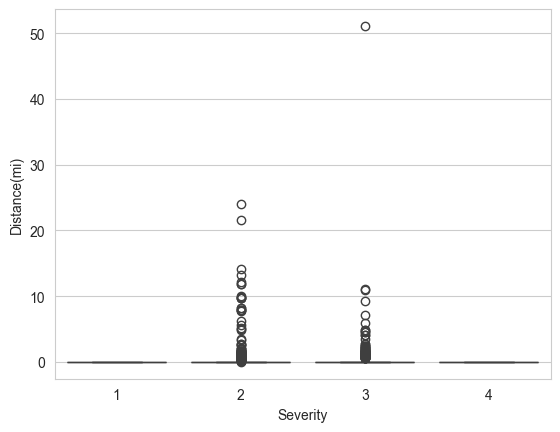

In [93]:
sns.boxplot(x='Severity', y='Distance(mi)', data=roadsafe_df)

<Axes: xlabel='Severity', ylabel='Temperature(F)'>

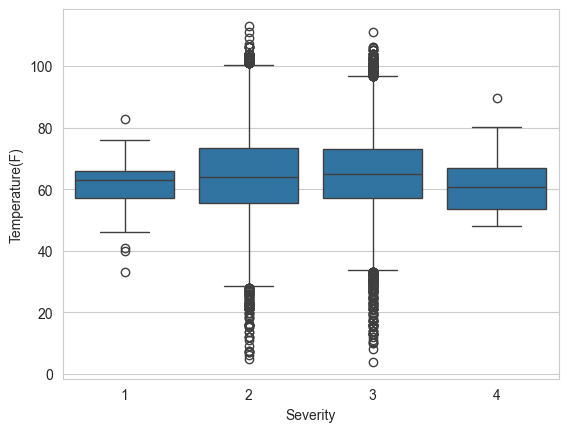

In [94]:
sns.boxplot(x='Severity', y='Temperature(F)', data=roadsafe_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Light Rain'),
  Text(1, 0, 'Overcast'),
  Text(2, 0, 'Mostly Cloudy'),
  Text(3, 0, 'Rain'),
  Text(4, 0, 'Light Snow'),
  Text(5, 0, 'Haze'),
  Text(6, 0, 'Scattered Clouds'),
  Text(7, 0, 'Partly Cloudy'),
  Text(8, 0, 'Clear'),
  Text(9, 0, 'Fair')])

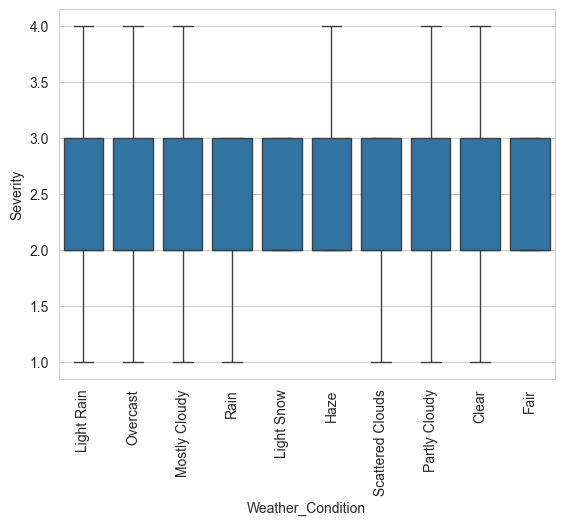

In [95]:
top_weather = roadsafe_df['Weather_Condition'].value_counts().index[:10]
sns.boxplot(x='Weather_Condition', y='Severity', data=roadsafe_df[roadsafe_df['Weather_Condition'].isin(top_weather)])
plt.xticks(rotation=90)

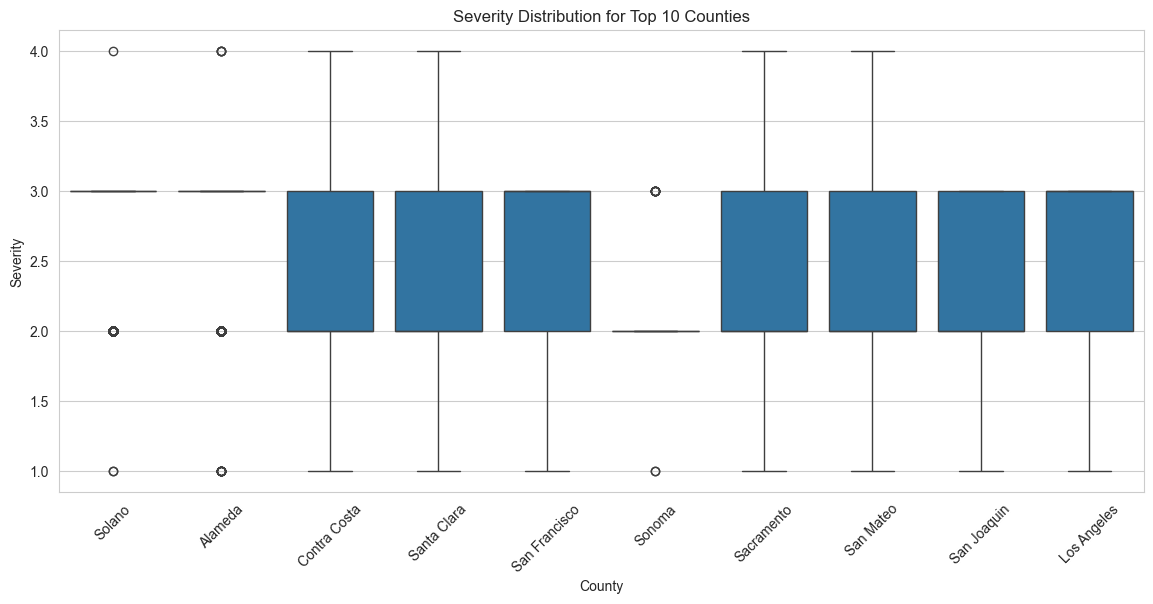

In [96]:
top10_counties = roadsafe_df['County'].value_counts().head(10).index
df_top10 = roadsafe_df[roadsafe_df['County'].isin(top10_counties)]
plt.figure(figsize=(14,6))
sns.boxplot(x='County', y='Severity', data=df_top10)
plt.title("Severity Distribution for Top 10 Counties")
plt.xticks(rotation=45)
plt.show()

### Step-5 : Multivariate Analysis

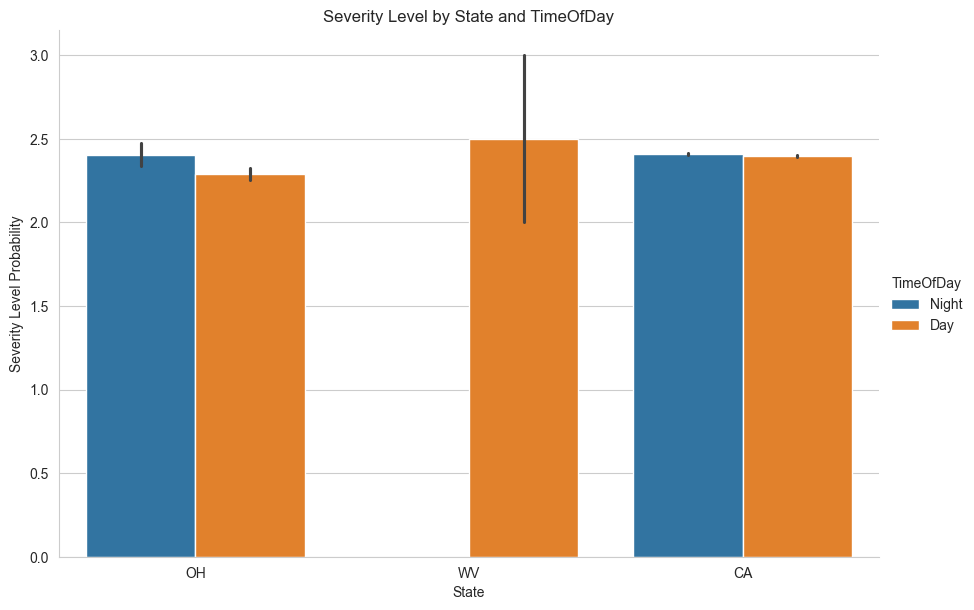

In [97]:
sns.catplot(x='State', y='Severity', hue='TimeOfDay', data=roadsafe_df, kind='bar', height=6, aspect=1.5)
plt.title('Severity Level by State and TimeOfDay')
plt.ylabel('Severity Level Probability')
plt.show()

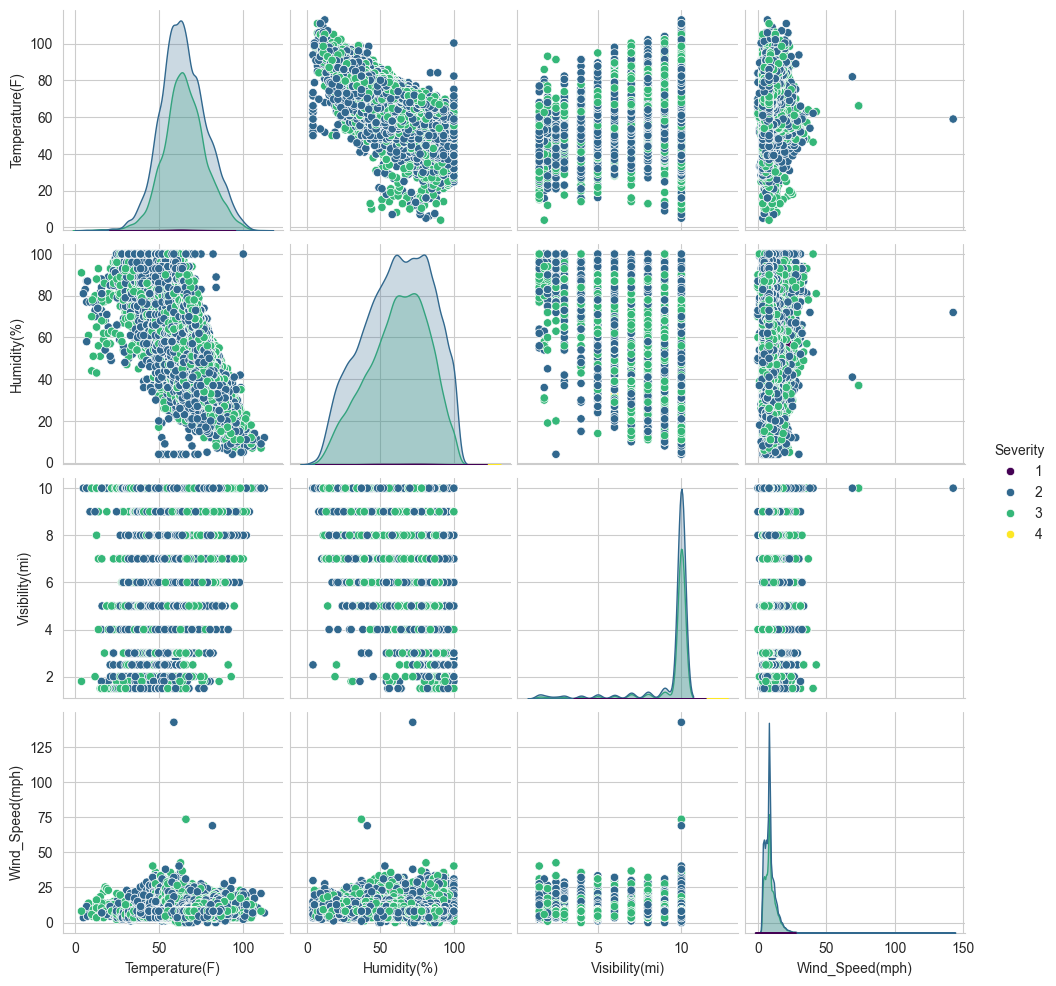

In [98]:
sns.pairplot(
    roadsafe_df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']],
    hue='Severity',
    palette='viridis',
    diag_kind='kde'
)
plt.show()

### Correlation Analysis

In [100]:
corrmat = roadsafe_df.corr(numeric_only=True)
corrmat

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,1.000000,-0.093796,-0.007298,0.000115,0.023375,0.000789,-0.018188,0.033781,0.050773,-0.069442,...,-0.177761,-0.042691,0.133496,0.014053,-0.014676,-0.006354,-0.057735,-0.114713,-0.010600,-0.183001
Start_Lat,-0.093796,1.000000,-0.086317,0.014729,-0.294226,-0.014687,0.128347,-0.041054,0.045797,0.013424,...,0.063072,0.008992,0.042845,-0.010541,-0.011365,0.002403,-0.085882,0.031347,0.004922,0.013462
Start_Lng,-0.007298,-0.086317,1.000000,0.005871,-0.124235,0.042085,-0.054896,-0.148190,0.012180,-0.009111,...,-0.009110,-0.013508,-0.060332,-0.003522,-0.009902,-0.002067,0.013282,-0.031599,-0.010689,0.057139
Distance(mi),0.000115,0.014729,0.005871,1.000000,-0.022646,0.015212,0.006106,-0.009595,0.000324,-0.001668,...,-0.003591,-0.001430,-0.006305,-0.000869,0.003064,-0.000322,-0.004183,0.012265,-0.001085,-0.004123
Temperature(F),0.023375,-0.294226,-0.124235,-0.022646,1.000000,-0.773451,-0.285367,0.249739,0.067018,-0.020135,...,-0.007611,-0.008258,-0.018560,0.005217,-0.000652,-0.000001,0.004004,-0.018428,-0.004629,0.009411
Humidity(%),0.000789,-0.014687,0.042085,0.015212,-0.773451,1.000000,0.129987,-0.367895,-0.084401,0.022391,...,-0.014540,0.008583,0.011715,-0.003056,0.007351,0.007920,0.026352,0.017412,0.006276,-0.022213
Pressure(in),-0.018188,0.128347,-0.054896,0.006106,-0.285367,0.129987,1.000000,0.019373,-0.128817,0.012351,...,0.016901,0.015434,0.012689,-0.000821,0.001528,0.001433,-0.000655,0.019267,0.007733,0.005384
Visibility(mi),0.033781,-0.041054,-0.148190,-0.009595,0.249739,-0.367895,0.019373,1.000000,-0.008543,0.008028,...,0.012033,0.002397,0.018219,0.005696,0.004403,0.002801,0.000157,0.003956,0.005509,-0.000859
Wind_Speed(mph),0.050773,0.045797,0.012180,0.000324,0.067018,-0.084401,-0.128817,-0.008543,1.000000,0.003410,...,-0.000854,-0.003892,0.032247,-0.007072,0.007524,-0.006173,0.001805,-0.006255,0.010523,-0.010287
Amenity,-0.069442,0.013424,-0.009111,-0.001668,-0.020135,0.022391,0.012351,0.008028,0.003410,1.000000,...,0.115846,0.035639,-0.037363,0.005915,0.035406,-0.000742,0.123281,0.049631,0.041750,0.078643


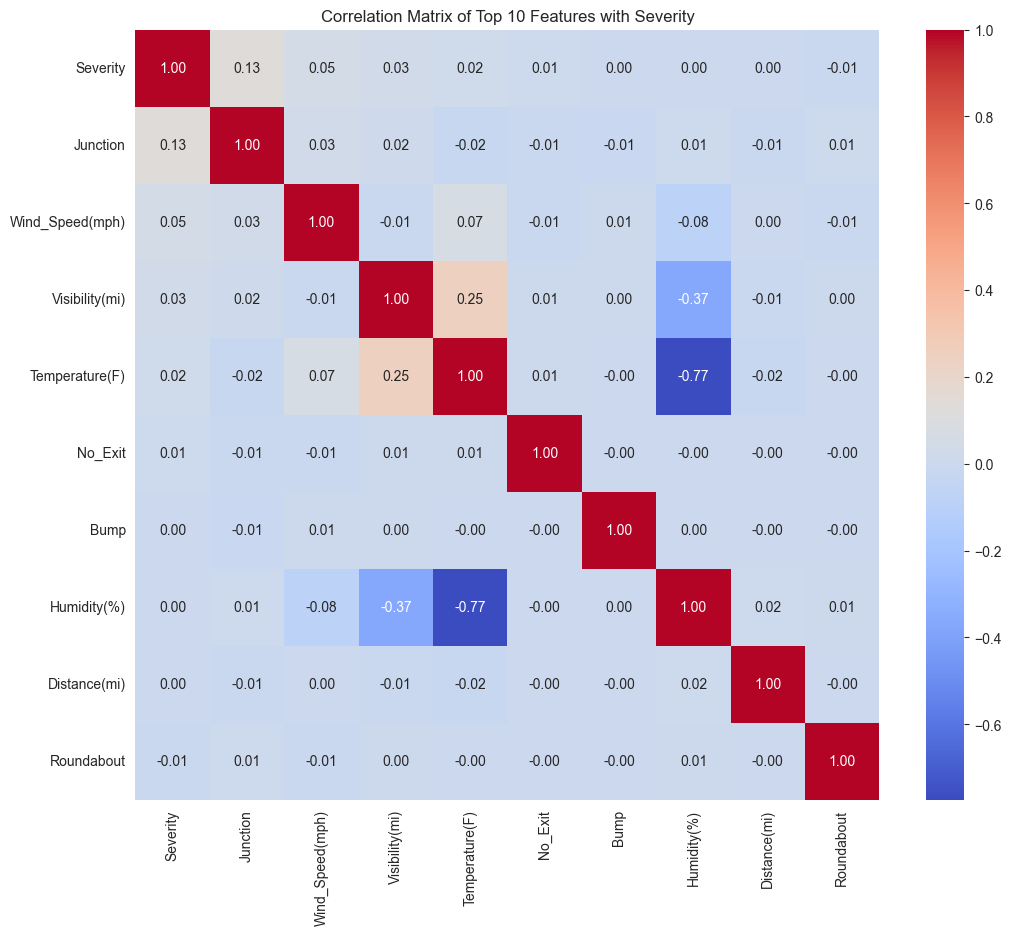

In [ ]:
top_corr_features = corrmat.nlargest(10, 'Severity')['Severity'].index
top_corr_matrix = roadsafe_df[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features with Severity')
plt.show()